# **Part-7: Data Loading via WebUI (Delta Load)**

## **Objective**:

* In Part 7, the process of continuous data loading via delta files is demonstrated using a small sample dataset.
* The focus is on validating the entire data flow, ensuring no compilation or setup issues, and testing the workflow before moving to full-scale loading from the S3 bucket.

**Delta File Simulation:**

* For testing purposes, a small dataset consisting of two delta files for each table, with one record each, is used.
* The aim is to validate the workflow and ensure the data moves seamlessly through the pipeline.

In [ ]:
# Load data with one record in each table and check the process

# Ensure the workflow is seamless through pipeline

**Data Loading Process:**

* Load order data.
* Load customer data.
* Load item data.
* Verify that the data is flowing from landing schema to curated schema using * streams and tasks.
* Check the consumption zone to see if the data is being processed and loaded correctly.

In [ ]:
select count(*) from chk.landing_zone.landing_order; --old records + one update
select count(*) from chk.landing_zone.landing_item; --old records + one update
select count(*) from chk.landing_zone.landing_customer; -- old records + one update

**Data Flow Validation:**

* Verify that data has moved automatically via streams and tasks from landing zone to curated zone.
* Check the customer, item, and order tables to ensure that the data has propagated correctly.

In [ ]:
select count(*) from chk.landing_zone.landing_order_stm;
select count(*) from chk.landing_zone.landing_item_stm;
select count(*) from chk.landing_zone.landing_customer_stm;

In [ ]:
select count(*) from chk.curated_zone.curated_order; --old records one updated and one inserted
select count(*) from chk.curated_zone.curated_item; --old records one updated and one inserted
select count(*) from chk.curated_zone.curated_customer; -- oldrecords one updated and one inserted


In [ ]:
select count(*) from chk.consumption_zone.order_fact;
select count(*) from chk.consumption_zone.item_dim;
select count(*) from chk.consumption_zone.customer_dim;

**Update and Insert Testing:**

* Load another set of delta files with updated and new records for each table.
* Test update and insert functionality using delta records.

In [ ]:
# Now you have to upload the second set of delta files and check

**Data Validation using Time Travel:**

* Utilize Snowflake's time travel feature to validate changes in the customer and item dimensions.
* Compare offset values and current values to confirm that updates and inserts are functioning as expected.

In [ ]:
select * from chk.consumption_zone.customer_dim where customer_id = 'AAAAAAAAPOJJJDAA'
union all
select * from chk.consumption_zone.customer_dim at(offset => -60*10) where customer_id = 'AAAAAAAAPOJJJDAA';


select * from chk.consumption_zone.item_dim where item_id = 'AAAAAAAACDLBXPPP'
union all
select * from chk.consumption_zone.item_dim at(offset => -60*10) where item_id = 'AAAAAAAACDLBXPPP';



We'll now explore a comparison between two values. Let's return to the web user interface (UI) and utilize the time travel feature to delve into the changes. In the context of the customer dimension, we are executing the same query, utilizing both the offset value and the current value to gain insights into any modifications. The outcomes of this query will provide us with a comprehensive understanding.

Upon analysis, the customer dimension values appear consistent, except for a single variation: the email address. Initially under the 'edu' domain, the email address has now changed to 'com.'

Shifting focus to the item dimension table, we've conducted a similar query to examine items that have undergone alterations. This exploration aims to reveal the outcomes of these changes. Notably, a significant transformation emerges: the price has shifted from 0.81 to 6.41, accompanied by a change in the description from 'loose stones and jewelry' to 'tennis and sports.' This observation signifies the successful functioning of both update and insert operations.

## **Delta Load via S3 Bucket - Enhanced**

Here we we delve into the dynamic process of performing delta loads via S3 bucket within our ETL workflow. The focus is on seamlessly loading fresh delta files for processing across various schema layers.

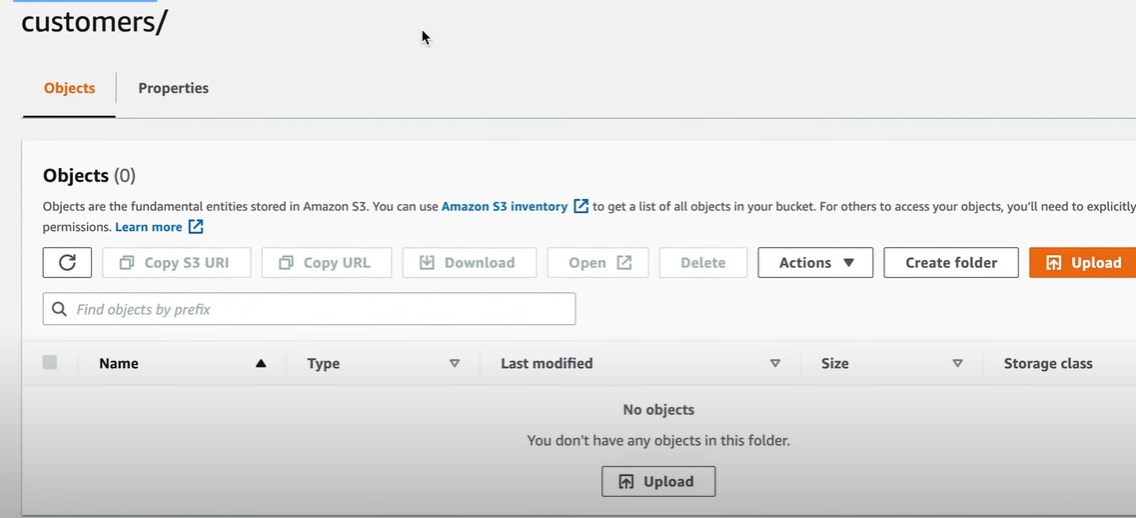

**Uploading Delta Data to S3:**

* We initiate the data loading process by using the AWS console's S3 upload function.
* Complete the  upload of delta datasets to the respective folders.

All the stage folders are empty. We have to load the data into s3 via Upload button

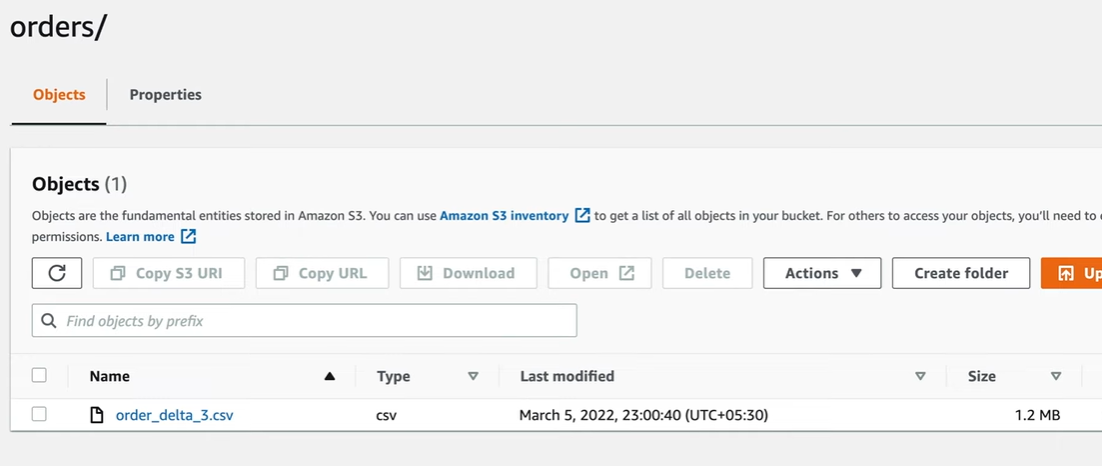

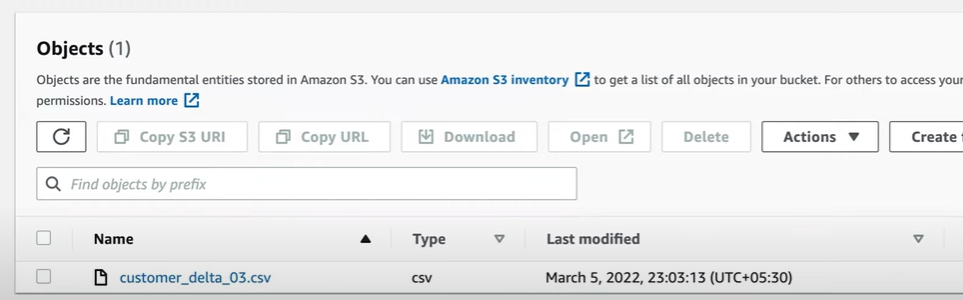

**Configured Environment Check:**

* We validate the readiness of our environment for data loading:
* SNS notifications are set up and operational.
* Snowpipe is active within the Snowflake environment.

**Verifying Landing Zone Data:**

* Before proceeding, we assess the existing data in our landing zone schema tables.
* The order, item, and customer tables are checked to establish the baseline data counts.

In [ ]:
select count(*) from chk.landing_zone.landing_order;
select count(*) from chk.landing_zone.landing_item;
select count(*) from chk.landing_zone.landing_customer;

**Initiating Data Loading:**

* We trigger the loading process and closely monitor its progress.
* For instance, the landing order table reveals that some records were successfully added via the pipe object.

**Copy History and Delta Loading:**

* We delve into the copy history for the landing zone schema tables.
* While examining the landing order table's history, we notice entries representing the initial history load and the subsequent delta files loaded for testing.

**Data Loading Verification:**

* We systematically validate data loading status for each table in the landing zone schema.
* By checking the landing item and customer tables, we ensure the success of the delta data loading process.

**Transition to Curated Zone:**

* Transitioning to the curated zone schema, we verify that the data loading process has been effectively executed through streams and tasks.
* Our focus remains on the order, item, and customer tables within this schema.

**Validating Curated Zone Data:**

* We examine the curated order, item, and customer tables to confirm successful data loading.
* The curated order table, for example, now showcases some rows, indicating the addition of some records via the pipe object.

**Copy History and Stream/Task Approach:**

Unlike the landing zone, copy history is not available for the curated zone schema tables, as data is loaded via streams and tasks employing SQL commands instead of the copy command.

**Confirmation of Consumption Zone Load:**

* Transitioning to the consumption zone schema, we verify that the data loading process has been equally effective in this layer.
*/ We confirm the updates in the customer and item dimension tables, as well as the order fact table.

**Successful Task Execution:**

* The execution of tasks is verified, displaying successful task resumptions and the SQL statements executed.
* This step serves as a comprehensive check to ensure the flawless functioning of the entire setup.

**Additional Delta Data Loading:**

* To illustrate the scalability of our system, we introduce additional delta datasets for orders, items, and customers.
* We check the snow site web page to confirm the successful processing of these new delta files.

**Unicode Issue in Customer Table:**

* An issue arises within the customer table due to unicode character problems.
* Rows from one of the delta files (delta 5) are entirely rejected due to this issue, as depicted in the color-coded status.

The successful execution of delta data loading showcases the robustness of the ETL process we've constructed. The integrated approach involving external stages, pipe objects, streams, and tasks ensures efficient and reliable data handling across diverse schema layers.